## Algoritmos e Programação Estruturada

APE-U4S2

### Pilhas

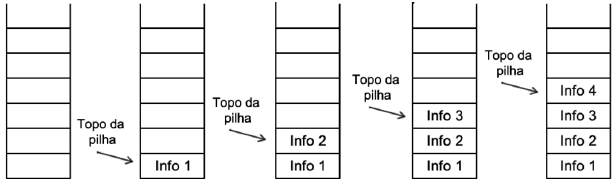

Sequência de funções *push()* (empurrar) e *pop()* (puxar) na pilha:

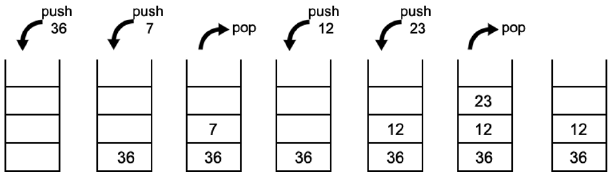

Criar uma estrutura de pilha:

In [ ]:
struct Pilha {
    int topo;
    int capacidade;
    float * proxElem;
};

struct Pilha minhaPilha;

Aloca memória:

In [ ]:
void cria_pilha(struct Pilha * p, int c) {
    p -> topo = -1;
    p -> capacidade = c;
    p -> proxElem = (float * ) malloc(c * sizeof(float));
}

Inserir elementos na pilha:

In [ ]:
void push_pilha(s truct Pilha * p, float v) {
    p -> topo++;
    p -> proxElem[p -> topo] = v;
}

Remover elementos da pilha:

In [ ]:
float pop_pilha(struct Pilha * p) {
    float aux = p -> proxElem[p -> topo];
    p -> topo--;
    return aux;
}

Informar se a pilha está vazia:

In [ ]:
/*Declaração da função pilha_vazia com passagem da pilha por parâmetro*/
int pilha_vazia(struct Pilha * p) {
    if (p -> topo == -1)
        return 1; /*Sendo o topo igual a -1, a função retorna verdadeiro*/
    else
        return 0; /*Caso contrário, a função retorna verdadeiro*/
}

Verificar se a pilha está cheia:

In [ ]:
int pilha_cheia(struct Pilha * p) {
    if (p -> topo == p -> capacidade - 1)
        return 1;
    else
        return 0;
}

Baseado no exemplo do livro *C Avançado - Guia do Usuário" de Herbert Schildt:

In [ ]:
#include <stdio.h>

#define MAX 100

int * p;     // will point to a region of free memory
int * tos;   // points to top of stack
int * bos;   // points to bottom of stack

// Place an element on the stack
void push(int i) {
    if (p > bos) {
        printf("stack full\n");
        return;
    }
    * p = i;
    p++;
}

// Return the top element from the stack
int pop() {
    p--;
    if (p < tos) {
        printf("stack underflow\n");
        return 0;
    }
    return * p;
}


// Main routine
int main() {
    int a, b, c; // auxiliary variables
    char s[80];  // input buffer

    // get stack memory
    p = (int * ) malloc(MAX * sizeof(int));
    if (!p) {
        printf("allocation failure\n");
        exit(1);
    }
    tos = p;
    bos = p + MAX - 1;
    printf("Four Function Calculator\n");

    do {
        // fgets(s, sizeof s, stdin);
        scanf("%s", s);
        switch ( * s) {
        case '+':
            a = pop();
            b = pop();
            c = a + b;
            printf("%d\n", c);
            push(c);
            break;
        case '-':
            a = pop();
            b = pop();
            c = b - a;
            printf("%d\n", b - a);
            push(c);
            break;
        case '*':
            a = pop();
            b = pop();
            c = b * a;
            printf("%d\n", c);
            push(c);
            break;
        case '/':
            a = pop();
            if (a == 0) {
                printf("divide by 0\n");
                break;
            }
            b = pop();
            c = b / a;
            printf("%d\n", c);
            push(c);
            break;

        // show contents of top of stack
        case '.': 
            a = pop();
            push(a);
            printf("Current value on top of stack: %d\n", a);
            break;

        // If the input is a number
        default:
            a = atoi(s);
            push(a);
        }
    } while ( * s != 'q');
}